<a href="https://colab.research.google.com/github/dianabutch023/IS4487/blob/main/Lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IS 4487 Module 5

## Outline

 - Identify the target variable for an analysis based on the business problem.
 - Compute the mean of a binary variable.
 - Plot a numeric (or count) variable against a categorical
    variable.
 - Calculate a count (and a proportion) for a categorical variable
    and visualize the result into a plot.

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Labs/Scripts/lab5_megatelco_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Megatelco Data Dictionary

 DEMOGRAPHIC VARIABLES:
 - College - has the customer attended some college (one, zero)
 - Income - annual income of customer
 - House - estimated price of the customer's home (if applicable)

 USAGE VARIABLES:
 - Data Overage Mb - Average number of megabytes that the customer used in excess of the plan limit (over last 12 months)
 - Data Leftover Mb - Average number of megabytes that the customer use was below the plan limit (over last 12 months)
 - Data Mb Used - Average number of megabytes used per month (over last 12 months)
 - Text Message Count - Average number of texts per month (over last 12 months)
 - Over 15 Minute Calls Per Month - Average number of calls over 15 minutes in duration per month (over last 12 months)
 - Average Call Duration- Average call duration (over last 12 months)

PHONE VARIABLES:
 - Operating System - Current operating system of phone
 - Handset Price - Retail price of the phone used by the customer

ATTITUDINAL VARIABLES:
 - Reported Satisfaction - Survey response to "How satisfied are you with your current phone plan?" (high, med, low)
 - Reported Usage Level - Survey response to "How much do your use your phone?" (high, med, low)
 - Considering Change of Plan - Survey response to "Are you currently planning to change companies when your contract expires?" (high, med, low)

OTHER VARIABLES
 - Leave - Did this customer churn with the last contract expiration? (LEAVE, STAY)
 - ID - Customer identifier

##Load Libraries

In this class we will be using
- Pandas
- Scikitlearn
- Matplotlib


In [19]:
import pandas as pd
import matplotlib as mpl
import sklearn as sl
import matplotlib.pyplot as plt
import seaborn as sns

## Import Data into Dataframe

➡️ Assignment Tasks
- Import data from the Megatelco dataset into a dataframe (in GitHub go to Labs > DataSets)
- Describe or profile the dataframe


In [7]:
df = pd.read_csv('https://github.com/Stan-Pugsley/is_4487_base/blob/main/Labs/DataSets/megatelco_leave_survey.csv?raw=true')
print(df.describe())

              income  data_overage_mb  data_leftover_mb  data_mb_used  \
count   14999.000000     14999.000000      14999.000000  14999.000000   
mean   241989.140476       153.522502         37.522035   4202.624442   
std    109603.370138       113.018111         28.046409   2202.763649   
min    -65000.000000         0.000000          0.000000    400.000000   
25%    147822.000000        54.000000         12.000000   2294.000000   
50%    241656.000000       151.000000         35.000000   4223.000000   
75%    336456.500000       242.000000         62.000000   6080.000000   
max    432000.000000       380.000000         89.000000   8000.000000   

       text_message_count         house  handset_price  \
count        14999.000000  1.499900e+04   14999.000000   
mean           135.622041  8.771616e+05     795.146810   
std             48.831061  2.870316e+05    1235.785429   
min             52.000000 -4.630000e+02     215.000000   
25%             93.000000  6.444405e+05     498.0000

## Clean up the dataset  

In [8]:
df_clean = df[(df['house'] > 0) & (df['income'] > 0) & (df['handset_price'] < 1000)]
df_clean.describe()

income  data_overage_mb  data_leftover_mb  data_mb_used  \
count   10414.000000     10414.000000      10414.000000  10414.000000   
mean   242040.366526       153.842712         37.473593   4195.329364   
std    109051.427100       113.017992         28.015913   2205.005466   
min     52491.000000         0.000000          0.000000    400.000000   
25%    148479.750000        55.000000         12.000000   2291.000000   
50%    241653.000000       151.000000         35.000000   4206.500000   
75%    335655.500000       242.000000         62.000000   6079.000000   
max    431916.000000       380.000000         89.000000   8000.000000   

       text_message_count         house  handset_price  \
count        10414.000000  1.041400e+04   10414.000000   
mean           135.500384  8.757861e+05     607.428462   
std             48.915506  2.868503e+05     225.509939   
min             52.000000  3.202380e+05     215.000000   
25%             93.000000  6.447420e+05     413.000000   
50%            135.000000  8.730110e+05     608.000000   
75%            178.000000  1.098260e+06     801.750000   
max            220.000000  1.456389e+06     999.000000   

       over_15mins_calls_per_month  average_call_duration            id  
count                 10412.000000           10414.000000  10414.000000  
mean                     10.571072               9.746207  11839.815729  
std                       8.444673               5.180746   6804.752823  
min                       0.000000               1.000000      2.000000  
25%                       3.000000               5.000000   6071.750000  
50%                       9.000000              10.000000  11743.000000  
75%                      17.000000              14.000000  17330.000000  
max                      35.000000              19.000000  25354.000000

## Calculate distribution of the outcome  

What is the proportion of people who churned?

In [9]:
df_clean[['house','leave']].groupby('leave').mean().round(2)

house
leave           
LEAVE  755351.30
STAY   995805.27

# Create basic charts

- Bar chart
- Histogram
- Box plot
- Scatter plot

<Axes: xlabel='leave'>

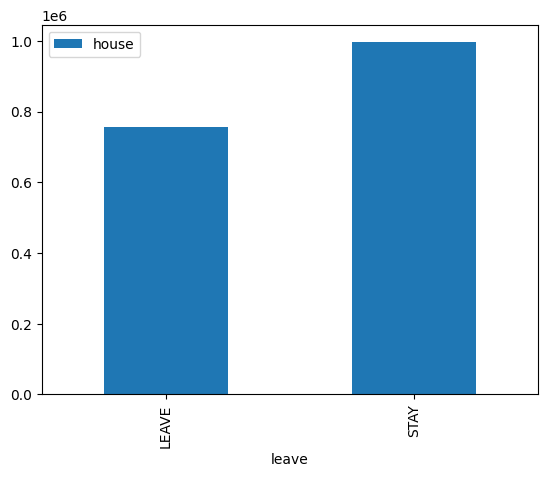

In [10]:
#Bar chart
df_clean[['house','leave']].groupby('leave').mean('house').plot.bar()


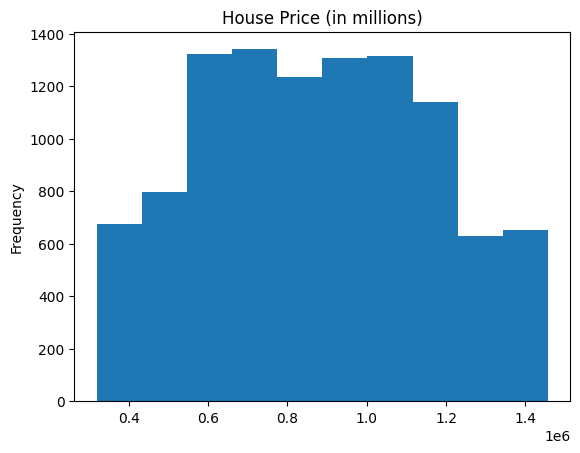

In [11]:
#Histogram
hist = df_clean['house'].plot.hist(bins=10,title='House Price (in millions)')


<Axes: title={'center': 'house'}, xlabel='[leave]'>

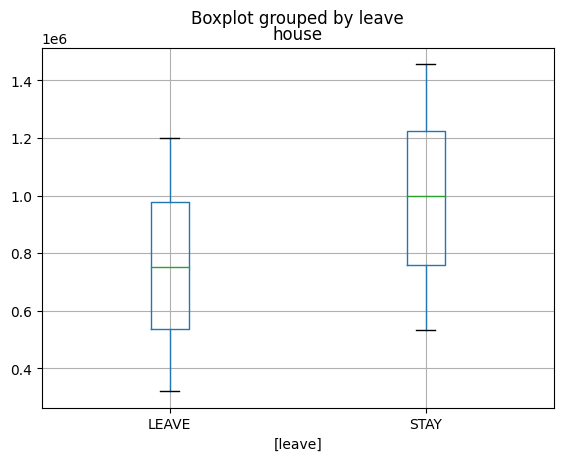

In [12]:
#Boxplot
df_clean[['leave','house']].boxplot(by='leave')

# Explore Relationships

###How does College affect leaving?

<Axes: xlabel='leave'>

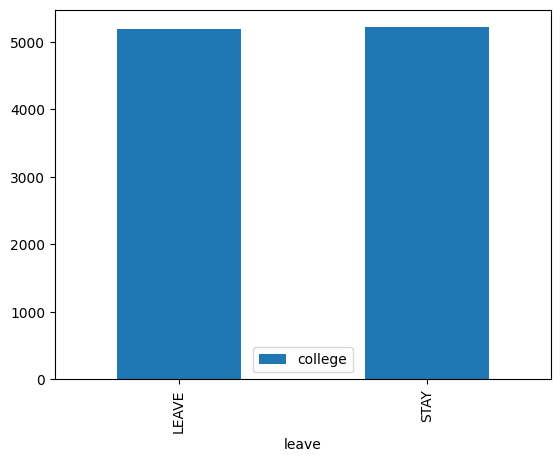

In [15]:
#Bar chart with counts
df_clean[['college','leave']].groupby('leave').count().plot.bar()

<Axes: xlabel='leave'>

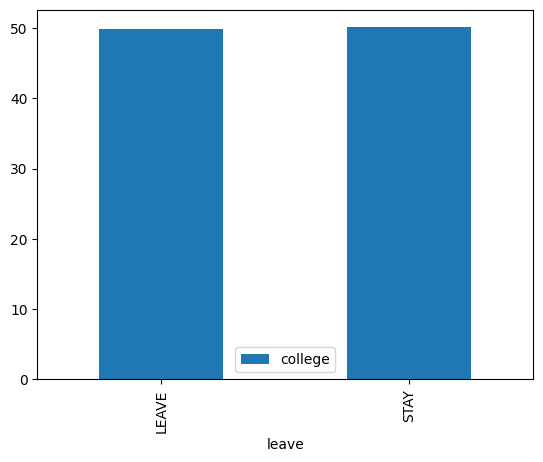

In [16]:
#Bar chart with percentage
college_summary = df_clean[['college','leave']].groupby('leave').count()

college_summary['college'] = (college_summary['college'] / college_summary['college'].sum()) * 100
#college_summary.head()
college_summary.plot.bar()

### How does phone price affect leaving?

<Axes: xlabel='leave'>

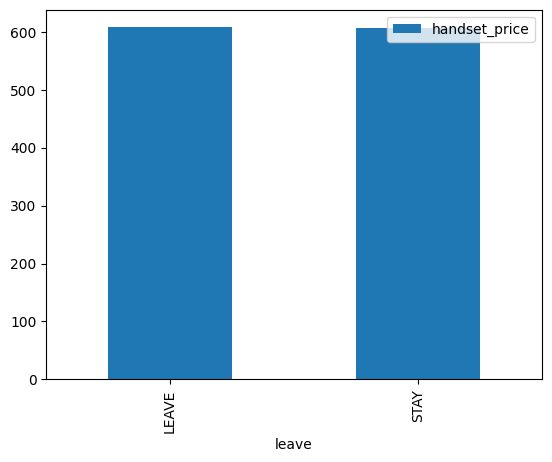

In [17]:
#Bar chart with mean price
handset_price_summary = df_clean[['handset_price','leave']].groupby('leave').mean(['handset_price'])
#handset_price_summary.head()

handset_price_summary.plot.bar()

### How about considering leaving?

<Axes: xlabel='leave'>

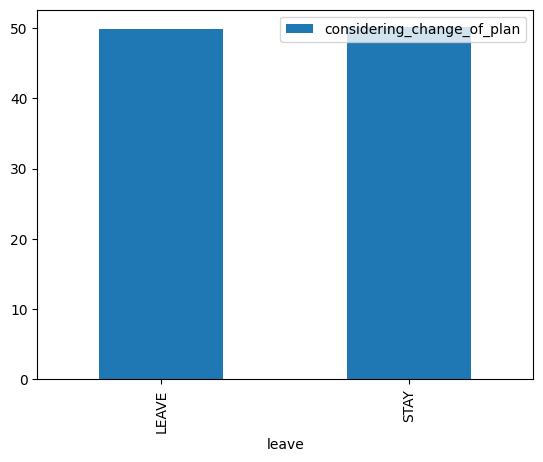

In [18]:
#Bar chart with percentage
plan = df_clean[['considering_change_of_plan','leave']].groupby('leave').count()

plan['considering_change_of_plan'] = (plan['considering_change_of_plan'] / plan['considering_change_of_plan'].sum()) * 100

plan.plot.bar()

## Create a Pair Plot
➡️ Assignment Tasks
- Import seaborn
- Create a Seaborn "pairplot" using all variables, with the color determine by "leave"
- Display the plot

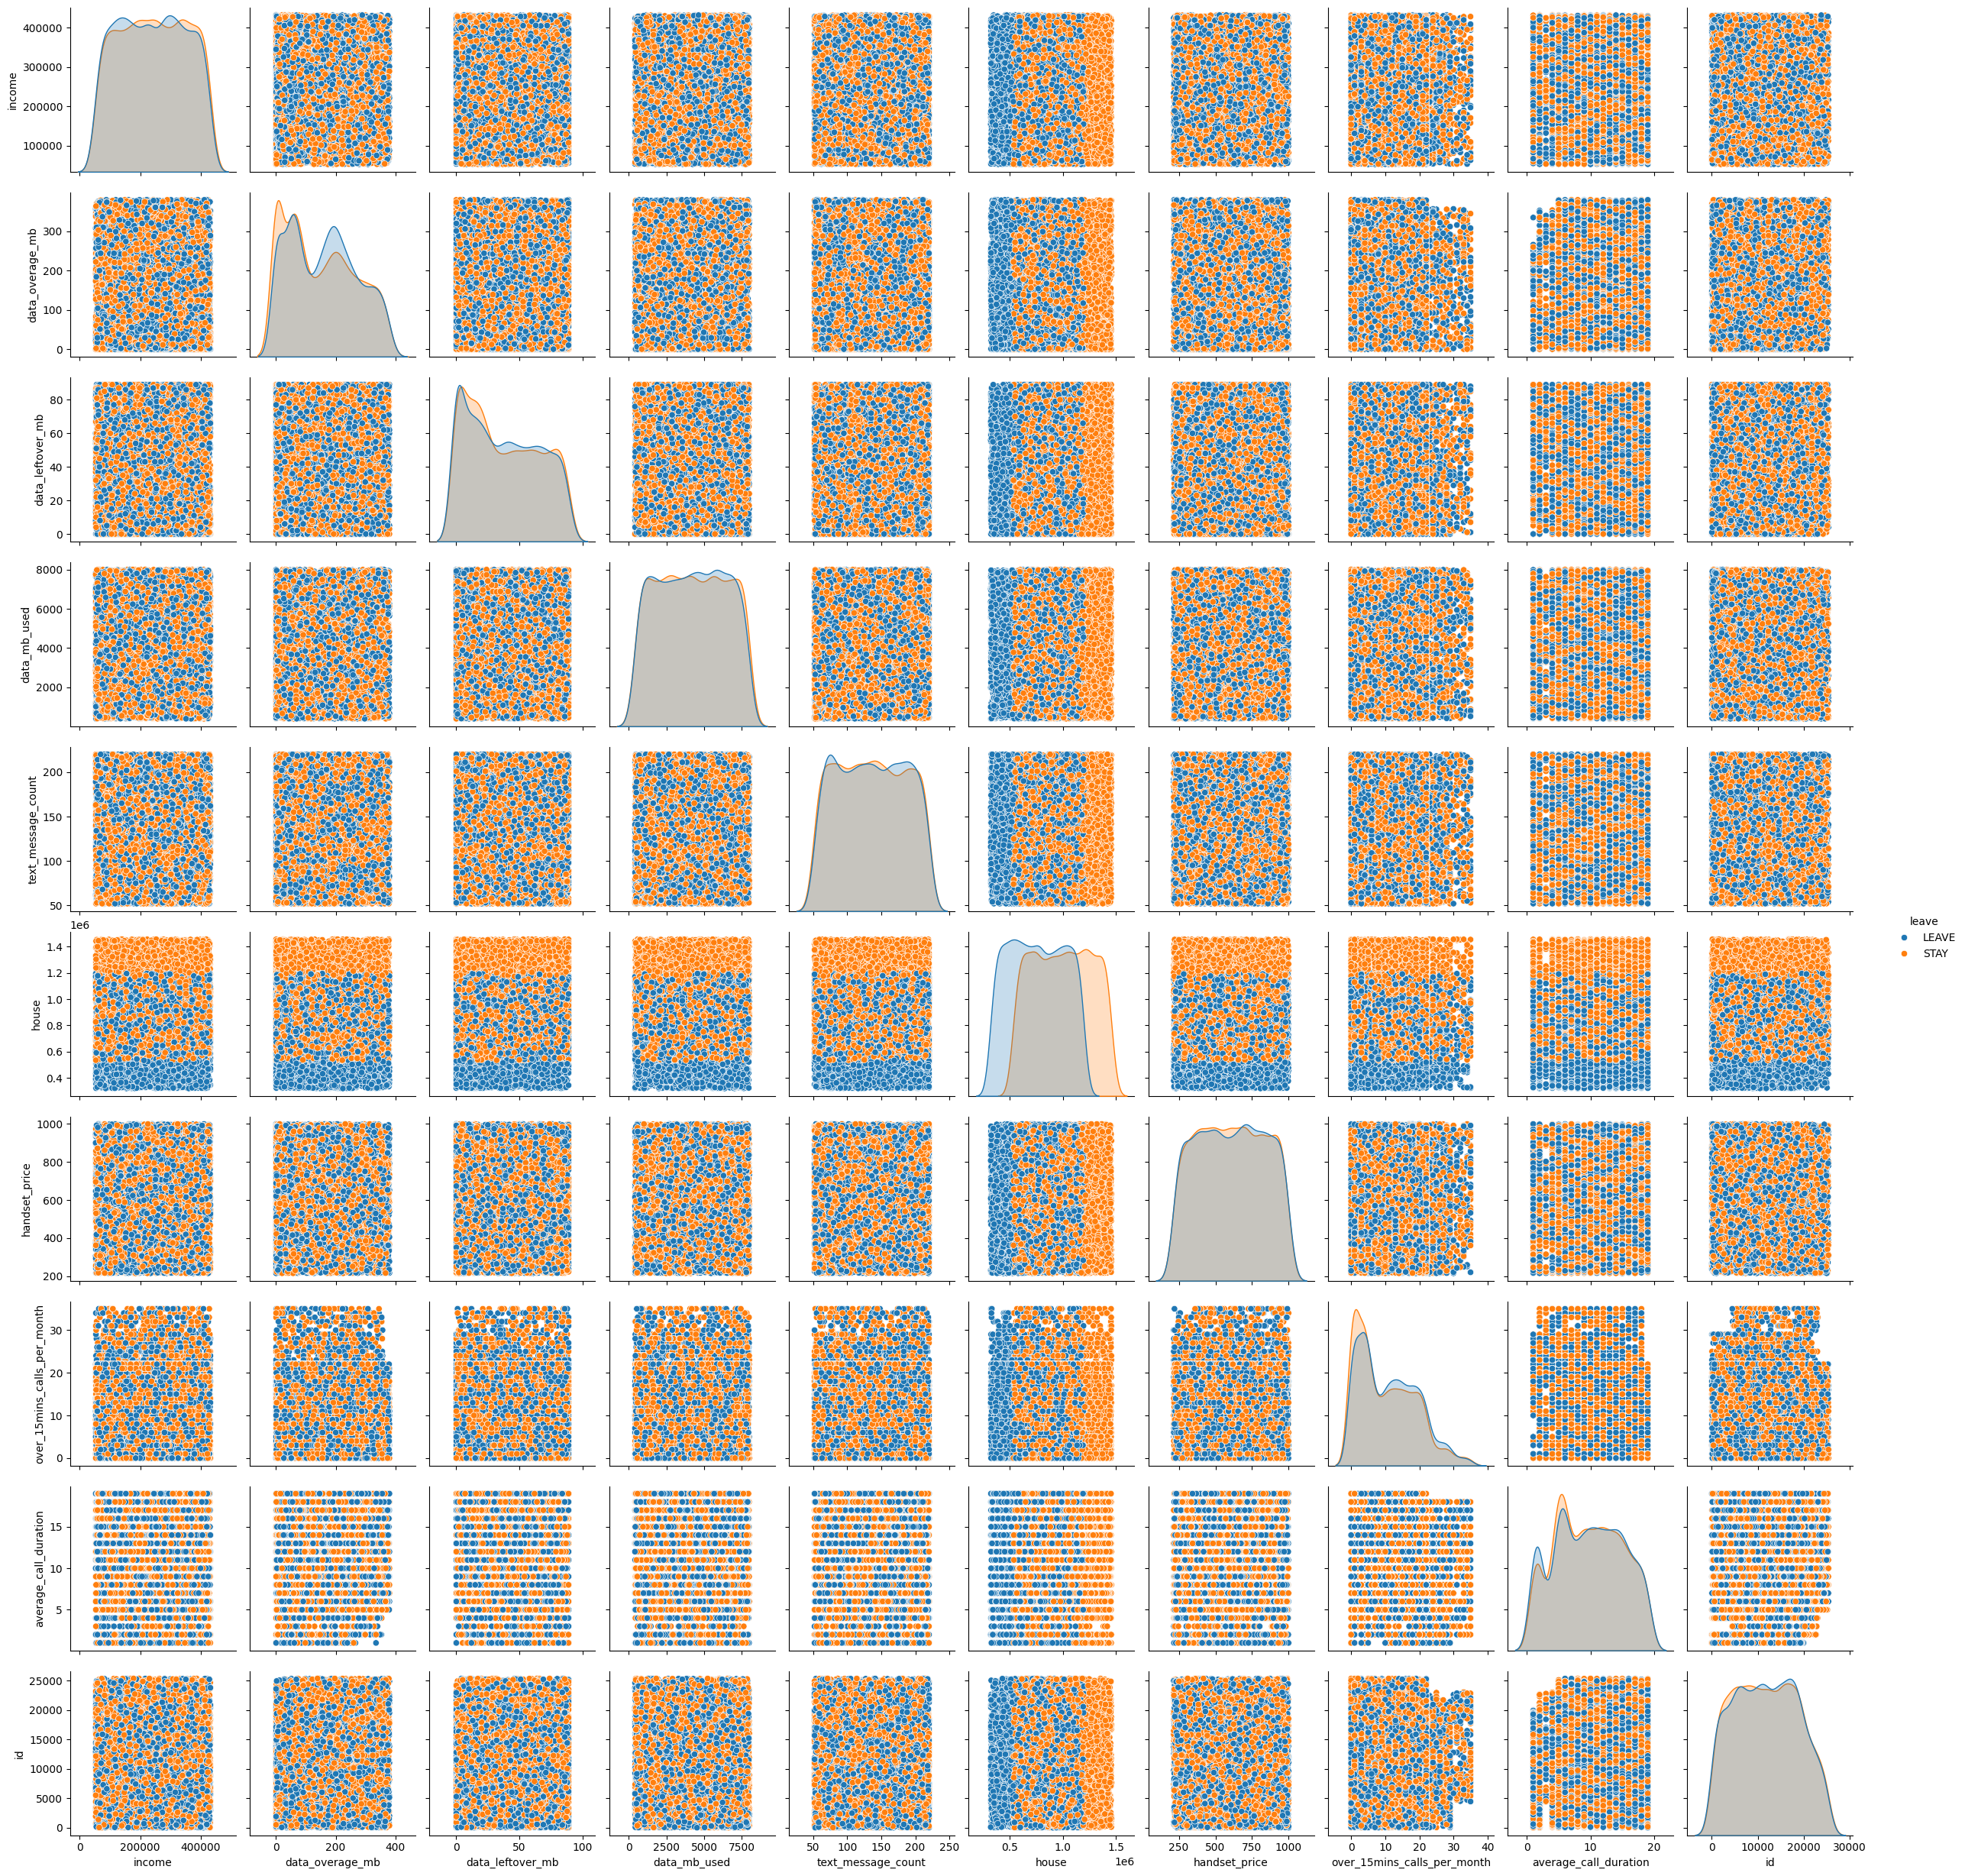

In [20]:
#pair plot
sns.pairplot(df_clean, hue='leave')

In [ ]:
Additional Cleanup

➡️ Assignment Tasks
- Remove any records with null values from the dataframe

In [22]:
df_clean = df_clean.dropna()
df_clean.describe()

income  data_overage_mb  data_leftover_mb  data_mb_used  \
count   10412.000000     10412.000000      10412.000000  10412.000000   
mean   242068.987706       153.847003         37.472436   4195.399827   
std    109041.788157       113.013727         28.015291   2205.189091   
min     52491.000000         0.000000          0.000000    400.000000   
25%    148548.000000        55.000000         12.000000   2290.750000   
50%    241663.000000       151.000000         35.000000   4206.500000   
75%    335660.500000       242.000000         62.000000   6079.250000   
max    431916.000000       380.000000         89.000000   8000.000000   

       text_message_count         house  handset_price  \
count        10412.000000  1.041200e+04   10412.000000   
mean           135.500000  8.758348e+05     607.473492   
std             48.916131  2.868363e+05     225.506388   
min             52.000000  3.202380e+05     215.000000   
25%             93.000000  6.447640e+05     413.000000   
50%            135.000000  8.730785e+05     608.000000   
75%            178.000000  1.098298e+06     802.000000   
max            220.000000  1.456389e+06     999.000000   

       over_15mins_calls_per_month  average_call_duration            id  
count                 10412.000000           10412.000000  10412.000000  
mean                     10.571072               9.747503  11839.793988  
std                       8.444673               5.180381   6805.159729  
min                       0.000000               1.000000      2.000000  
25%                       3.000000               5.000000   6070.750000  
50%                       9.000000              10.000000  11743.000000  
75%                      17.000000              14.000000  17330.500000  
max                      35.000000              19.000000  25354.000000

## Summarize Data

➡️ Assignment Tasks
- Create a second set of charts that include the outlier values (house, income, price).   How do the outliers affect the values in the charts?

<Axes: title={'center': 'house'}, xlabel='[leave]'>

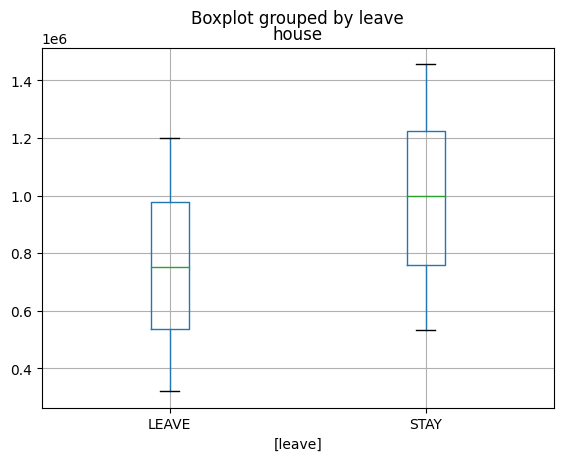

In [30]:
#house price
df_clean[['leave','house']].boxplot(by='leave')

<Axes: title={'center': 'income'}, xlabel='[leave]'>

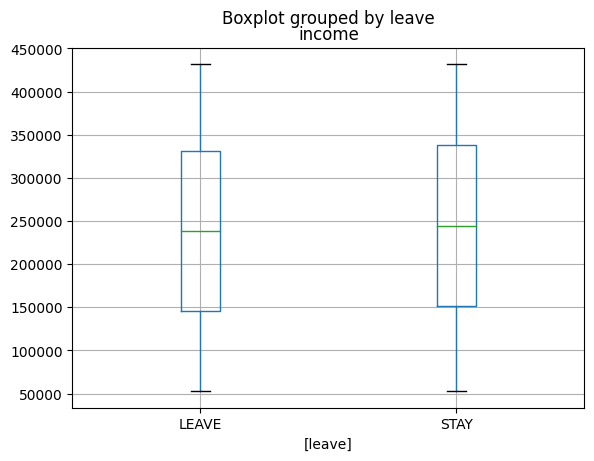

In [24]:
#income
df_clean[['leave','income']].boxplot(by='leave')

<Axes: title={'center': 'handset_price'}, xlabel='[leave]'>

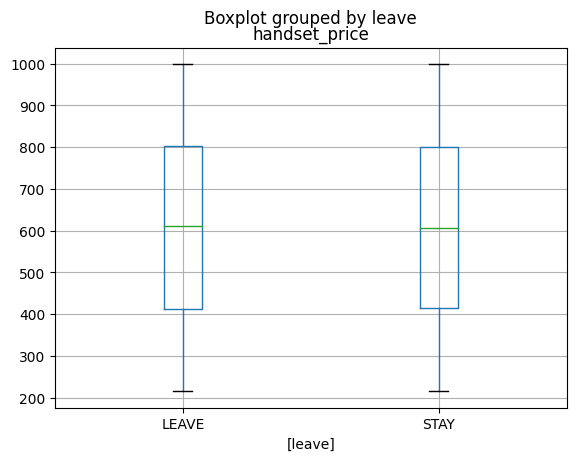

In [31]:
#price
df_clean[['leave','handset_price']].boxplot(by='leave')